**Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import zipfile
# import os

# # Path to the zip file in Google Drive
# zip_file_path = '/content/drive/MyDrive/Tamil_Meme/training_img.zip'

# # Define the directory where you want to extract the files
# extract_dir = '/content/drive/MyDrive/Tamil_Meme/Train_img'

# # Create the directory if it doesn't exist
# os.makedirs(extract_dir, exist_ok=True)

# # Unzip the file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

# print(f"Files extracted to {extract_dir}")


In [ ]:
# import zipfile
# import os

# # Path to the zip file in Google Drive
# zip_file_path = '/content/drive/MyDrive/Tamil_Meme/test_img.zip'

# # Define the directory where you want to extract the files
# extract_dir = '/content/drive/MyDrive/Tamil_Meme/Test_img'

# # Create the directory if it doesn't exist
# os.makedirs(extract_dir, exist_ok=True)

# # Unzip the file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

# print(f"Files extracted to {extract_dir}")

**Import Libraries**

In [ ]:
!pip install tensorflow
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re,nltk,json
from bs4 import BeautifulSoup
### ML Librarires--------------------
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
###-------------------------------------------
#from keras.utils.vis_utils import plot_model
np.random.seed(42)
import string, spacy,unicodedata, random
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install keras_preprocessing
from keras.preprocessing import image
from tensorflow.keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.densenet import DenseNet121
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, GlobalAveragePooling2D, Embedding, LSTM, multiply
from keras.models import Model
from keras import preprocessing, Input
from tensorflow import keras
from keras.models import Sequential
#Import from keras_preprocessing not from keras.preprocessing
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from tensorflow.keras.models import load_model
import itertools
from PIL import Image, ImageFile
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Concatenate, Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Flatten, Reshape, Permute
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Convolution1D,MaxPooling1D,Conv1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Add, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop,Adam,SGD,Nadam

**Dataset Import and Preprocess**

In [ ]:
# # Locate images from /content/drive/MyDrive/CM_MEMES-master/LREC_COLING_meme
# image_folder = "/content/drive/MyDrive/CM_MEMES-master/LREC_COLING_meme"
# image_names = set(os.listdir(image_folder))

# # Import sample_data.csv from /content/drive/MyDrive/CM_MEMES-master/sample_data.csv
# csv_file_path = "/content/drive/MyDrive/CM_MEMES-master/sample_data.csv"
# df = pd.read_csv(csv_file_path)

# # Cross-check all the image names with the Name column and remove rows that don't exist
# df = df[df["Name"].isin(image_names)]

# # Display the updated DataFrame
# print(df)

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Tamil_Meme/train_captions.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Tamil_Meme/test_captions.csv')

print("Number of Training Data: ", len(train_data))
print("Number of Test Data: ", len(test_data))

Number of Training Data:  2300
Number of Test Data:  667


In [ ]:
train_data.head()

,Unnamed: 0,imagename,captions
0,0,Not_troll_0.jpg,Ada pikkalipayalugala
1,1,Not_troll_1.jpg,Etho sambavam nadandhirukkum pola
2,2,Not_troll_10.jpg,Vunnayellam frienda vechirukken paaru
3,3,Not_troll_100.jpg,Idho! Ivan dhaan naan nasama ponadhukku kaaranam
4,4,Not_troll_1000.jpg,Ennada lusu thanama pesikittu irukka lusu payale


In [ ]:
train_label = train_data.imagename
train_label = train_label.apply(lambda x: 0 if x.split('_')[0] == 'Not' else 1)
train_data['label'] = train_label
a = pd.read_csv('/content/drive/MyDrive/Tamil_Meme/gold_labels_for_test.csv')
a['label'].replace(['not_troll','troll'],[1,0],inplace=True)
test_data['label'] = a['label']

In [ ]:
test_data.head()

,Unnamed: 0,imagename,captions,label
0,0,test_img_0.jpg,sugarkaga nadandhava vida figuregaga nadandhav...,0
1,1,test_img_1.jpg,i have come for my stones stones thaane.....,0
2,2,test_img_2.jpg,"""special porotta"" nu pottuierukke spacial kum ...",0
3,3,test_img_3.jpg,*we : amma .. cooker 3 whistle vanthuchu off p...,0
4,4,test_img_4.jpg,creating whatsapp group - 1st day vaanga ji.. ...,0


Text(0.5, 1.0, '0')

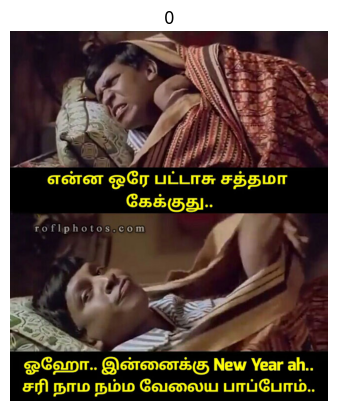

In [ ]:
from matplotlib import image as im
data = im.imread('/content/drive/MyDrive/Tamil_Meme/Train_img/uploaded_tamil_memes/Not_troll_1002.jpg',0)
plt.figure()
plt.axis('off')
plt.imshow(data)
plt.title(train_data['label'][1002])

In [ ]:
# Function that returns image reading from the path
def get_input(path):
    # Loading image from given path
    # and resizing it to 150*150*3 format
    ImageFile.LOAD_TRUNCATED_IMAGES = True
    img = tf.keras.utils.load_img(path, target_size=(150,150))
    return(img)

# Takes in image and preprocess it
def process_input(img):
    # Converting image to array
    img_data = tf.keras.utils.img_to_array(img)
    # Adding one more dimension to array
    img_data = np.expand_dims(img_data, axis=0)
    #
    img_data = preprocess_input(img_data)
    return(img_data)


In [ ]:
test_img_dir_path = '/content/drive/MyDrive/Tamil_Meme/Test_img/test_img'

# Initialize the list to store image paths
test_img_path = []
# Append each image path to the list
for root, dirs, files in os.walk(test_img_dir_path):
    for file in files:
        # Create the full path to the image file and append it to the list
        if file.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):  # add any other image formats if needed
            test_img_path.append(os.path.join(root, file))

In [ ]:
train_img_dir_path = '/content/drive/MyDrive/Tamil_Meme/Train_img/uploaded_tamil_memes'

# Initialize the list to store image paths
train_img_path = []
# Append each image path to the list
for root, dirs, files in os.walk(train_img_dir_path):
    for file in files:
        # Create the full path to the image file and append it to the list
        if file.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):  # add any other image formats if needed
            train_img_path.append(os.path.join(root, file))

In [ ]:
# Create an array of test images
test_images = []
for i,m in enumerate(test_img_path):
  input_img = get_input(m)
  input_img = process_input(input_img)
  test_images.append(input_img[0])
  print(i)

# convert into numpy array
test_image = np.array(test_images)
print(test_image.shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
# Create an array of training images
train_images = []
for i,m in enumerate(train_img_path):
  input_img = get_input(m)
  input_img = process_input(input_img)
  train_images.append(input_img[0])
  print(i)

# convert into numpy array
train_image = np.array(train_images)
print(train_image.shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
'''
Text Cleaning
'''
def text_cleaning(row):
   #to remove HTML tags
  text = BeautifulSoup(row, 'html.parser').get_text()
  d = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE) #This line is for removing url
  post = d.replace('\n', '')
  post = post.replace('—', ' ')
  post = post.replace('।', ' ')
  text = ''.join([c for c in post if c not in string.punctuation])
  # to remove special characters
  pattern = r'^\s*|\s\s*'
  text = re.sub(pattern, ' ', text).strip()
  # convert into lower case
  text = text.lower()
  # # Stopword
  # result = text.split()
  # text = [word.strip() for word in result if word not in stp ]
  # text =" ".join(text)

  return text

In [ ]:
test_data.head()

,Unnamed: 0,imagename,captions,label
0,0,test_img_0.jpg,sugarkaga nadandhava vida figuregaga nadandhav...,0
1,1,test_img_1.jpg,i have come for my stones stones thaane.....,0
2,2,test_img_2.jpg,"""special porotta"" nu pottuierukke spacial kum ...",0
3,3,test_img_3.jpg,*we : amma .. cooker 3 whistle vanthuchu off p...,0
4,4,test_img_4.jpg,creating whatsapp group - 1st day vaanga ji.. ...,0


In [ ]:
#Removing punctuations
train_data['cleaned'] = train_data['captions'].apply(text_cleaning)
test_data['cleaned'] = test_data['captions'].apply(text_cleaning)


In [ ]:
train_data.head()

,Unnamed: 0,imagename,captions,label,cleaned
0,0,Not_troll_0.jpg,Ada pikkalipayalugala,0,ada pikkalipayalugala
1,1,Not_troll_1.jpg,Etho sambavam nadandhirukkum pola,0,etho sambavam nadandhirukkum pola
2,2,Not_troll_10.jpg,Vunnayellam frienda vechirukken paaru,0,vunnayellam frienda vechirukken paaru
3,3,Not_troll_100.jpg,Idho! Ivan dhaan naan nasama ponadhukku kaaranam,0,idho ivan dhaan naan nasama ponadhukku kaaranam
4,4,Not_troll_1000.jpg,Ennada lusu thanama pesikittu irukka lusu payale,0,ennada lusu thanama pesikittu irukka lusu payale


In [ ]:
!pip install --upgrade scikit-learn
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

encoded_labels = pd.DataFrame(encoder.fit_transform(train_data[['label']]))

# Check scikit-learn version and use appropriate method
import sklearn
if sklearn.__version__ >= '0.20':
    encoded_labels.columns = encoder.get_feature_names_out(['label'])  # Use get_feature_names_out for version 0.20 and above
else:
    encoded_labels.columns = encoder.active_features_  # Use active_features for older versions

train_data = pd.concat([train_data, encoded_labels], axis=1)

In [ ]:
train_data

,Unnamed: 0,imagename,captions,label,cleaned
0,0,Not_troll_0.jpg,Ada pikkalipayalugala,0,ada pikkalipayalugala
1,1,Not_troll_1.jpg,Etho sambavam nadandhirukkum pola,0,etho sambavam nadandhirukkum pola
2,2,Not_troll_10.jpg,Vunnayellam frienda vechirukken paaru,0,vunnayellam frienda vechirukken paaru
3,3,Not_troll_100.jpg,Idho! Ivan dhaan naan nasama ponadhukku kaaranam,0,idho ivan dhaan naan nasama ponadhukku kaaranam
4,4,Not_troll_1000.jpg,Ennada lusu thanama pesikittu irukka lusu payale,0,ennada lusu thanama pesikittu irukka lusu payale
...,...,...,...,...,...
2295,2345,troll_439.jpg,amma yaaro orutharu... pattu paaduraaruma......,1,amma yaaro orutharu pattu paaduraaruma amma na...
2296,2346,troll_44.jpg,Phone n Twitter hacked please don't respond ...,1,phone n twitter hacked please dont respond any...
2297,2347,troll_440.jpg,Respected deat @narendramodi ji hearty corigr...,1,respected deat narendramodi ji hearty corigrat...
2298,2348,troll_441.jpg,Engu irutha nan mnnil piranthidum bothu vera...,1,engu irutha nan mnnil piranthidum bothu vera e...


In [ ]:
def data_summary(dataset):
    documents = []
    words = []
    u_words = []
    class_label= [k for k,v in dataset.label.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.label==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
    # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
    # Documents per class
        documents.append(len(list(dataset[dataset.label==label].cleaned)))
    # Total Word per class
        words.append(len(word_list))
    # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Comments:{}".format(len(list(dataset[dataset.label==label].cleaned))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:50]:
              print("{}\t{}".format(k,v))

    return documents,words,u_words,class_label

In [ ]:
documents,words,u_words,class_names = data_summary(train_data)


Class Name :  1
Number of Comments:1282
Number of Words:15578
Number of Unique Words:7467
Most Frequent Words:

da	123
oru	106
la	102
ah	97
no	90
in	85
me	74
dhan	73
my	65
when	62
indha	58
nee	56
nu	56
comments	56
en	55
enna	54
the	52
ku	49
is	47
to	46
a	46
na	45
than	39
sir	39
and	36
nalla	35
this	35
you	33
after	32
like	31
idhu	31
mattum	31
of	30
adhu	30
that	30
enga	30
captions	29
yen	29
i	29
kids	29
yenna	28
nan	28
aana	27
kuda	27
tv	26
andha	26
amma	25
panna	25
poi	25
illa	25

Class Name :  0
Number of Comments:1018
Number of Words:5513
Number of Unique Words:2985
Most Frequent Words:

no	81
captions	76
yenna	59
naan	57
oru	57
indha	56
dhaan	48
yen	42
idhu	33
ni	31
romba	29
andha	27
namma	26
irukku	25
da	24
idhellam	22
illa	22
vunakku	21
paaru	20
yenga	20
dei	20
ipidi	19
vera	19
naama	18
inga	18
yenakku	18
post	17
ivan	16
innum	16
aiyo	16
irukke	16
ah	15
yellam	15
vun	15
maadhiri	15
mattum	14
vandhu	14
poi	14
friend	13
nalla	13
yenda	13
periya	13
ninga	13
like	12
yennaiya	12
ha	1

**Eval**

In [ ]:
def print_metrices(true,pred):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,target_names=['0','1']))
    print("Accuracy : ",accuracy_score(true,pred))
    print("Precison : ",precision_score(true,pred, average = 'weighted'))
    print("Recall : ",recall_score(true,pred,  average = 'weighted'))
    print("F1 : ",f1_score(true,pred,  average = 'weighted'))

In [ ]:
models_path = "/content/drive/MyDrive/CM_MEMES-master/model/"

In [ ]:
''' Callbacks'''
keras.backend.clear_session()
def callbacks_check(model_name):
  accuracy_threshold = 0.98

  class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>accuracy_threshold):
          print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
          self.model.stop_training = True

  acc_callback = myCallback()
  # Saved the Best Model
  filepath = models_path+f"{model_name}.h5"
  checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
  callback_list = [acc_callback, checkpoint]

  return callback_list

In [ ]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_data['label']),
                                        y = train_data['label']
                                    )
class_weights = dict(zip(np.unique(train_data['label']), class_weights))
class_weights

{0: 1.1296660117878192, 1: 0.8970358814352574}

**VISUAL MODELS**

In [ ]:
def visual_models(pretrained_model):
  '''
      Input: Pretrained Models weight
  '''
  base_model = pretrained_model
  base_model.trainable = False
  y = base_model.output
  pool = GlobalAveragePooling2D()(y)
  #flatten = Flatten()(pool)
  output = Dense(3, activation='softmax')(pool)
  # train model
  img_model = Model(inputs=base_model.input, outputs=output)

  return img_model

In [ ]:
xception = Xception(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
inception = InceptionV3(weights='imagenet', include_top=False,input_shape=(150, 150, 3)) #added inception
vgg19 = VGG19(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
vgg16 = VGG16(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
resnet = ResNet50(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
densenet = DenseNet121(weights='imagenet', include_top=False,input_shape=(150, 150, 3))

29084464/29084464 [==============================] - 0s 0us/step


XCeption

In [ ]:
xcept_model = visual_models(xception)
xcept_model.compile(loss='sparse_categorical_crossentropy',
                    optimizer=Adam(),
                    metrics = ["accuracy"])

In [ ]:
keras.backend.clear_session()
xcept_model.fit(x=train_image,
              y=train_data['label'],
              epochs=20,
              batch_size =32,
              validation_split = 0.1,
              verbose = 1,
              #class_weight = weight,
              callbacks = callbacks_check('xception')
              )

In [ ]:
 # Prediction
model = load_model("/content/drive/MyDrive/CM_MEMES-master/model/xception.h5")
pred = model.predict(test_image)
y_pred = np.argmax(pred,axis=1)

21/21 [==============================] - 65s 3s/step


In [ ]:
y_true = test_data['label']
print_metrices(y_true,y_pred)

VGG 19

In [ ]:
vgg19_model = visual_models(vgg19)
vgg19_model.compile(loss='sparse_categorical_crossentropy',
                    optimizer=Adam(),
                    metrics = ["accuracy"])

In [ ]:
keras.backend.clear_session()
vgg19_model.fit(x=train_image,
              y=train_data['label'],
              epochs=20,
              batch_size =32,
              validation_split = 0.1,
              verbose = 1,
              callbacks = callbacks_check('vgg19')
              )

In [ ]:
 # Prediction
model = load_model(models_path+"vgg19.h5")
pred = model.predict(test_image)
y_pred = np.argmax(pred,axis=1)

21/21 [==============================] - 7s 316ms/step


In [ ]:
y_true = test_data['label']
print_metrices(y_true,y_pred)

VGG 16

In [ ]:
keras.backend.clear_session()
vgg16_model = visual_models(vgg16)
vgg16_model.compile(loss='sparse_categorical_crossentropy',
                    optimizer=RMSprop(),
                    metrics = ["accuracy"])

In [ ]:
vgg16_model.fit(x=train_image,
              y=train_data['label'],
              epochs=20,
              batch_size =32,
              validation_split = 0.1,
              verbose = 1,
              callbacks = callbacks_check('vgg16')
              )

In [ ]:
 # Prediction
model = load_model(models_path+"vgg16.h5")
pred = model.predict(test_image)
y_pred = np.argmax(pred,axis=1)

21/21 [==============================] - 6s 277ms/step


In [ ]:
y_true = test_data['label']
print_metrices(y_true,y_pred)

ResNET

In [ ]:
keras.backend.clear_session()
resnet_model = visual_models(resnet)
resnet_model.compile(loss='sparse_categorical_crossentropy',
                    optimizer=RMSprop(),
                    metrics = ["accuracy"])

In [ ]:
resnet_model.fit(x=train_image,
              y=train_data['label'],
              epochs=20,
              batch_size =32,
              validation_split = 0.1,
              verbose = 1,
              callbacks = callbacks_check('resnet-1')
              )

In [ ]:
 # Prediction
model = load_model(models_path+"resnet-1.h5")
pred = model.predict(test_image)
y_pred = np.argmax(pred,axis=1)

21/21 [==============================] - 6s 261ms/step


In [ ]:
y_true = test_data['label']
print_metrices(y_true,y_pred)

DenseNET

In [ ]:
keras.backend.clear_session()
densenet_model = visual_models(densenet)
densenet_model.compile(loss='sparse_categorical_crossentropy',
                    optimizer=Adam(),
                    metrics = ["accuracy"])

In [ ]:
densenet_model.fit(x=train_image,
              y=train_data['label'],
              epochs=20,
              batch_size =32,
              validation_split = 0.1,
              verbose = 1,
              callbacks = callbacks_check('densenet')
              )

In [ ]:
 # Prediction
model = load_model(models_path+"densenet.h5")
pred = model.predict(test_image)
y_pred = np.argmax(pred,axis=1)

21/21 [==============================] - 8s 258ms/step


In [ ]:
y_true = test_data['label']
print_metrices(y_true,y_pred)

Inception

In [ ]:
inception_model = visual_models(inception)
inception_model.compile(loss='sparse_categorical_crossentropy',
                    optimizer=Adam(),
                    metrics = ["accuracy"])

In [ ]:
keras.backend.clear_session()
inception_model.fit(x=train_image,
              y=train_data['label'],
              epochs=20,
              batch_size =32,
              validation_split = 0.1,
              verbose = 1,
              callbacks = callbacks_check('inception')
              )

In [ ]:
#prediction
model = load_model(models_path+"inception.h5")
pred = model.predict(test_image)
y_pred = np.argmax(pred,axis=1)

21/21 [==============================] - 3s 95ms/step


In [ ]:
y_true = test_data['label']
print_metrices(y_true,y_pred)

In [ ]:
visual_models = ['xception','vgg19','vgg16','resnet-1','densenet','inception']
visual_model_names = ['Xception','Vgg19','Vgg16','Resnet','Densenet','InceptionV3']

def visual_models_accuracy(saved_model):
  my_dict = {}
  # Prediction
  model = load_model(models_path+f"{saved_model}.h5")
  pred = model.predict(test_image)
  y_pred = np.argmax(pred,axis=1)

  y_true = test_data['label']

  my_dict['Accuracy'] = accuracy_score(y_true, y_pred)*100
  my_dict['Precision'] = precision_score(y_true, y_pred,average = 'weighted')*100
  my_dict['Recall'] = recall_score(y_true, y_pred,average = 'weighted')*100
  my_dict['F1 Score'] = f1_score(y_true, y_pred,average = 'weighted')*100
  return my_dict

In [ ]:
results_path = '/content/drive/MyDrive/CM_MEMES-master'

accuracy = {f'{visual_model_names[i]}':visual_models_accuracy(model) for i,model in enumerate(visual_models)}
# Save the performance parameter into json file
with open(results_path+'visual_models_performance.json', 'w') as f:
    json.dump(accuracy, f)

21/21 [==============================] - 3s 96ms/step


In [ ]:
# Load the json file
metrics = json.load(open(results_path+'visual_models_performance.json'))
acc_list = []
pr_list = []
re_list = []
f1_list = []
for i in metrics.keys():
  acc_list.append(round(metrics[i]['Accuracy'],2))
  pr_list.append(round(metrics[i]['Precision'],2))
  re_list.append(round(metrics[i]['Recall'],2))
  f1_list.append(round(metrics[i]['F1 Score'],2))

print (color.BOLD+f"=======  Visual Models Performance on Test Data  =============\n"+color.END)
# Create a dataframe
performance_matrix = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =['Xception','Vgg19','Vgg16','Resnet','Densenet','InceptionV3'])
performance_matrix

**Text Model**

In [ ]:
# Text Feature Extraction using TF-IDF
cv = TfidfVectorizer(use_idf=True,tokenizer=lambda x: x.split())
train_X = cv.fit_transform(train_data.cleaned)

# Test data
test_X = cv.transform(test_data.cleaned)

print("\nShape of TF-IDF Corpus =====>",train_X.shape)
print("\nShape of TF-IDF Corpus =====>",test_X.shape)


Shape of TF-IDF Corpus =====> (2300, 9612)

Shape of TF-IDF Corpus =====> (667, 9612)


In [ ]:
lr_model = LogisticRegression(random_state = 123)
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
rf_model = RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state = 0)
mnb_model = MultinomialNB(alpha=0.05)
svm_model = SVC(kernel = 'linear',probability=True,random_state = 0)
model_names = ['Logistic Regression','Naive Bayes','SVM']
ml_models = [lr_model,mnb_model,svm_model]

def model_accuracy(model,X_train,X_test,y_train,y_test):
  my_dict = {}
  model.fit(X_train,y_train)
  # Prediction
  pred_y = model.predict(X_test)
  my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),3)*100
  my_dict['Precision'] = round(precision_score(y_test, pred_y,average='weighted'),3)*100
  my_dict['Recall'] = round(recall_score(y_test, pred_y,average='weighted'),3)*100
  my_dict['F1 Score'] = round(f1_score(y_test, pred_y,average='weighted'),3)*100
  return my_dict

# call model accuracy function and save the metrices into a dictionary
accuracy = {f'{model_names[i]}':model_accuracy(model,train_X,test_X,train_data['label'],test_data['label']) for i,model in enumerate(ml_models)}
# Save the performance parameter into json file
with open("/content/drive/MyDrive/CM_MEMES-master"+'ml_model_performance.json', 'w') as f:
    json.dump(accuracy, f)

In [ ]:
# Load the json file
accuracy = json.load(open("/content/drive/MyDrive/CM_MEMES-master"+'ml_model_performance.json'))
acc_list = []
pr_list = []
re_list = []
f1_list = []
for i in accuracy.keys():
  acc_list.append(accuracy[i]['Accuracy'])
  pr_list.append(accuracy[i]['Precision'])
  re_list.append(accuracy[i]['Recall'])
  f1_list.append(accuracy[i]['F1 Score'])

# Create a dataframe
performance_matrix = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =['LR','MNB','SVM'])
performance_matrix

Model Definition

In [ ]:
def text_tokenizer(train_data,test_data,vocabulary,max_len,sample_text_num):

  tokenizer = Tokenizer(num_words = vocabulary ,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-',
                        split=' ', char_level=False, oov_token='<oov>', document_count=0)
  tokenizer.fit_on_texts(train_data['captions'])
  word_index = tokenizer.word_index
  vocab_size = len(word_index)+1

  # Training Sequences
  train_sequences = tokenizer.texts_to_sequences(train_data['captions'])
  train_pad_sequences =  keras.preprocessing.sequence.pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)

  # valid Sequences
  # valid_sequences = tokenizer.texts_to_sequences(valid_data['Captions'])
  # valid_pad_sequences =  keras.preprocessing.sequence.pad_sequences(valid_sequences, value=0.0, padding='post', maxlen= max_len)


  # Test Sequences
  test_sequences = tokenizer.texts_to_sequences(test_data['captions'])
  test_pad_sequences =  keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)


  print(color.BOLD+"\n\t\t\t====== Encoded Sequences ======"+color.END,"\n")
  print(train_data.captions[sample_text_num],"\n",train_sequences[sample_text_num])
  print(color.BOLD+"\n\t\t\t====== Paded Sequences ======\n"+color.END,"\n",train_pad_sequences[sample_text_num])

  return train_pad_sequences,  test_pad_sequences, vocab_size, word_index

  # return train_pad_sequences, valid_pad_sequences, test_pad_sequences, vocab_size, word_index


vocabulary = 15000
max_len = 60
sample_text_num = 10

## Call Tokenizer
# train_pad_sequences, valid_pad_sequences, test_pad_sequences, vocab_size, word_index =  text_tokenizer(train_data,test_data,
#                                                                       vocabulary,max_len,sample_text_num)

train_pad_sequences,  test_pad_sequences, vocab_size, word_index =  text_tokenizer(train_data,test_data,
                                                                      vocabulary,max_len,sample_text_num)

print("Number of Train Sequences :" ,train_pad_sequences.shape)
# print("Number of Test Sequences :" ,valid_pad_sequences.shape)
print("Number of Test Sequences :" ,test_pad_sequences.shape)
print("Vocabulary Size: ",vocab_size)


			====== Encoded Sequences ====== 

(no caption) 
 [2, 695]

			====== Paded Sequences ======
 
 [  2 695   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0]
Number of Train Sequences : (2300, 60)
Number of Test Sequences : (667, 60)
Vocabulary Size:  9594


In [ ]:
###### BiLSTM Model #######
bi_text_inputs = Input(shape=(max_len,))
bi_embedding_layer = Embedding(vocab_size,64)(bi_text_inputs)
LSTM_Layer_1 = Bidirectional(LSTM(32))(bi_embedding_layer)
bi_dense_layer_1 = Dense(3, activation='softmax')(LSTM_Layer_1)
bilstm_model = Model(inputs=bi_text_inputs, outputs=bi_dense_layer_1)

In [ ]:
keras.backend.clear_session()
bilstm_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


bilstm_model.fit(train_pad_sequences,
    train_data['label'],
    epochs=20,
    batch_size =32,
    validation_split = 0.1,
    verbose =1,
    callbacks = callbacks_check('lstm'))

In [ ]:
 # Prediction
model = load_model("/content/drive/MyDrive/CM_MEMES-master/model/lstm.h5")
pred = model.predict(test_pad_sequences)
y_pred = np.argmax(pred,axis=1)

21/21 [==============================] - 1s 8ms/step


In [ ]:
y_true = test_data['label']
print_metrices(y_true,y_pred)

In [ ]:
### CNN
cnn_text_inputs = Input(shape=(max_len,))
cnn_embedding_layer = Embedding(vocab_size,64)(cnn_text_inputs)
cnn_conv1 = Conv1D(64,2,activation='relu')(cnn_embedding_layer)
cnn_conv2 = Conv1D(32,2,activation='relu')(cnn_conv1)
cnn_pool1 = MaxPooling1D(2)(cnn_conv2)

cnn_flat = Flatten()(cnn_pool1)
cnn_dense_layer_1 = Dense(3, activation='softmax')(cnn_flat)
cnn_model = Model(inputs=cnn_text_inputs, outputs=cnn_dense_layer_1)

In [ ]:
keras.backend.clear_session()
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


cnn_model.fit(train_pad_sequences,
    train_data['label'],
    epochs=20,
    batch_size =32,
    validation_split = 0.1,
    verbose =1,
    callbacks = callbacks_check('cnn'))

In [ ]:
 # Prediction
model = load_model(models_path+"cnn.h5")
pred = model.predict(test_pad_sequences)
y_pred = np.argmax(pred,axis=1)
y_true = test_data['label']
print_metrices(y_true,y_pred)

In [ ]:
##### LSTM-CNN Model ####
lc_text_inputs = Input(shape=(max_len,))
lc_embedding_layer = Embedding(vocab_size,64)(lc_text_inputs)
LSTM_Layer = Bidirectional(LSTM(32,return_sequences=True))(lc_embedding_layer)
lc_conv1 = Conv1D(32,2,activation='relu')(LSTM_Layer)
lc_pool1 = MaxPooling1D(2)(lc_conv1)
lc_flat = Flatten()(lc_pool1)
lc_dense_layer_1 = Dense(3, activation='softmax')(lc_flat)
cnn_lstm_model = Model(inputs=lc_text_inputs, outputs=lc_dense_layer_1)

In [ ]:
keras.backend.clear_session()
cnn_lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


cnn_lstm_model.fit(train_pad_sequences,
    train_data['label'],
    epochs=20,
    batch_size =32,
    validation_split = 0.1,
    verbose =1,
    callbacks = callbacks_check('lstm-cnn'))

In [ ]:
 # Prediction
model = load_model(models_path+"lstm-cnn.h5")
pred = model.predict(test_pad_sequences)
y_pred = np.argmax(pred,axis=1)
y_true = test_data['label']
print_metrices(y_true,y_pred)

**Multimodal (Late Fusion)**

In [ ]:
def visual_models():
  '''
      Input: Pretrained Models weight
  '''
  ## ResNet50
  resnet = ResNet50(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
  resnet_model = resnet
  resnet_model.trainable = False
  resnet_y = resnet_model.output
  resnet_pool = GlobalAveragePooling2D()(resnet_y)
  resnet_output = Dense(2, activation='softmax')(resnet_pool)
  # this is the model we will train
  resnet_img_model = Model(inputs=resnet_model.input, outputs=resnet_output)

  ## VGG16
  vgg16 = VGG16(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
  vgg16_model = vgg16
  vgg16_model.trainable = False
  vgg16_y = vgg16_model.output
  vgg16_pool = GlobalAveragePooling2D()(vgg16_y)
  vgg16_output = Dense(2, activation='softmax')(vgg16_pool)
  # this is the model we will train
  vgg16_img_model = Model(inputs=vgg16_model.input, outputs=vgg16_output)

  ## DenseNet
  densenet = DenseNet121(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
  densenet_model = densenet
  densenet_model.trainable = False
  densenet_y = densenet_model.output
  densenet_pool = GlobalAveragePooling2D()(densenet_y)
  densenet_output = Dense(2, activation='softmax')(densenet_pool)
  # this is the model we will train
  densenet_img_model = Model(inputs=densenet_model.input, outputs=densenet_output)

  image_models = [resnet_img_model,densenet_img_model,vgg16_img_model]

  return image_models


def textual_models():

  ###### BiLSTM Model #######
  bi_text_inputs = Input(shape=(max_len,))
  bi_embedding_layer = Embedding(vocab_size,64)(bi_text_inputs)
  LSTM_Layer_1 = Bidirectional(LSTM(32))(bi_embedding_layer)
  bi_dense_layer_1 = Dense(3, activation='softmax')(LSTM_Layer_1)
  bilstm_model = Model(inputs=bi_text_inputs, outputs=bi_dense_layer_1)


  ### CNN
  cnn_text_inputs = Input(shape=(max_len,))
  cnn_embedding_layer = Embedding(vocab_size,64)(cnn_text_inputs)
  cnn_conv1 = Conv1D(64,2,activation='relu')(cnn_embedding_layer)
  cnn_conv2 = Conv1D(32,2,activation='relu')(cnn_conv1)
  cnn_pool1 = MaxPooling1D(2)(cnn_conv2)

  cnn_flat = Flatten()(cnn_pool1)
  cnn_dense_layer_1 = Dense(3, activation='softmax')(cnn_flat)
  cnn_model = Model(inputs=cnn_text_inputs, outputs=cnn_dense_layer_1)



  ##### LSTM-CNN Model ####
  lc_text_inputs = Input(shape=(max_len,))
  lc_embedding_layer = Embedding(vocab_size,64)(lc_text_inputs)
  LSTM_Layer = Bidirectional(LSTM(32,return_sequences=True))(lc_embedding_layer)
  lc_conv1 = Conv1D(32,2,activation='relu')(LSTM_Layer)
  lc_pool1 = MaxPooling1D(2)(lc_conv1)
  lc_flat = Flatten()(lc_pool1)
  lc_dense_layer_1 = Dense(3, activation='softmax')(lc_flat)
  cnn_lstm_model = Model(inputs=lc_text_inputs, outputs=lc_dense_layer_1)

  ############
  dl_textual_models = [bilstm_model,cnn_model,cnn_lstm_model]

  return dl_textual_models

In [ ]:
visual_model_name = ['ResNet','DenseNet','Vgg16']
visual_models_lsit = visual_models()

dl_textual_model_name = ['LSTM','CNN','LSTM+CNN']
dl_textual_models_lsit = textual_models()

In [ ]:
for tm,textual_model in enumerate(dl_textual_models_lsit):
  # Concatenating the output of 2 classifiers
  con_layer = keras.layers.concatenate([visual_models_lsit[0].output, textual_model.output])
  # Provide a unique name for this Dense layer using tm in the name
  final_dense = Dense(4, activation="relu", name=f"final_dense_{tm}")(con_layer)
  #dropout = Dropout(0.1)(final_dense)
  # Provide a unique name for the output layer using tm in the name
  out = Dense(2,activation='softmax', name=f"output_layer_{tm}")(final_dense)
  com_model = Model(inputs = [visual_models_lsit[0].input, textual_model.input], outputs=out)

  com_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics = ["accuracy"])


  print("\nModel Name:=====>\n",visual_model_name[0]+'_'+dl_textual_model_name[tm]+'_late')

  com_model.fit([train_image,train_pad_sequences],
                      train_data['label'],
                      validation_split = 0.1,
                      epochs=20,
                      batch_size=32,
                      callbacks = callbacks_check(visual_model_name[0]+'_'+dl_textual_model_name[tm]+'_late')
            )


In [ ]:
for tm,textual_model in enumerate(dl_textual_models_lsit):
  # Concatenating the output of 2 classifiers
  con_layer = keras.layers.concatenate([visual_models_lsit[1].output, textual_model.output])
  # Provide a unique name for this Dense layer using tm in the name
  final_dense = Dense(4, activation="relu", name=f"final_dense_{tm}")(con_layer)
  #dropout = Dropout(0.1)(final_dense)
  # Provide a unique name for the output layer using tm in the name
  out = Dense(2,activation='softmax', name=f"output_layer_{tm}")(final_dense)
  com_model = Model(inputs = [visual_models_lsit[1].input, textual_model.input], outputs=out)

  com_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics = ["accuracy"])


  print("\nModel Name:=====>\n",visual_model_name[1]+'_'+dl_textual_model_name[tm]+'_late')

  com_model.fit([train_image,train_pad_sequences],
                      train_data['label'],
                      validation_split = 0.1,
                      epochs=20,
                      batch_size=32,
                      callbacks = callbacks_check(visual_model_name[1]+'_'+dl_textual_model_name[tm]+'_late')
            )

In [ ]:
for tm,textual_model in enumerate(dl_textual_models_lsit):
  # Concatenating the output of 2 classifiers
  con_layer = keras.layers.concatenate([visual_models_lsit[2].output, textual_model.output])
  # Provide a unique name for this Dense layer using tm in the name
  final_dense = Dense(4, activation="relu", name=f"final_dense_{tm}")(con_layer)
  #dropout = Dropout(0.1)(final_dense)
  # Provide a unique name for the output layer using tm in the name
  out = Dense(2,activation='softmax', name=f"output_layer_{tm}")(final_dense)
  com_model = Model(inputs = [visual_models_lsit[2].input, textual_model.input], outputs=out)

  com_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics = ["accuracy"])


  print("\nModel Name:=====>\n",visual_model_name[2]+'_'+dl_textual_model_name[tm]+'_late')

  com_model.fit([train_image,train_pad_sequences],
                      train_data['label'],
                      validation_split = 0.1,
                      epochs=20,
                      batch_size=32,
                      callbacks = callbacks_check(visual_model_name[2]+'_'+dl_textual_model_name[tm]+'_late')
            )

In [ ]:
for vm in visual_model_name:
  for tm in dl_textual_model_name:
    print('Model name ===> ',vm+'_'+tm)
    model = load_model(models_path+ vm+'_'+tm+'_late'+".h5")
    pred = model.predict([test_image,test_pad_sequences])
    y_pred = np.argmax(pred,axis=1)
    print_metrices(test_data['label'], y_pred)

INCEPTION V3 (MULTIMODAL- Late)

In [ ]:
def visual_models():
  '''
      Input: Pretrained Models weight
  '''
  #Inception Model
  inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
  inception_model = inception
  inception_model.trainable = False
  inception_y = inception_model.output
  inception_pool = GlobalAveragePooling2D()(inception_y)
  inception_output = Dense(2, activation='softmax')(inception_pool)
  inception_img_model = Model(inputs=inception_model.input, outputs=inception_output)
  image_models = [inception_img_model]


  return image_models


def textual_models():

  ###### BiLSTM Model #######
  bi_text_inputs = Input(shape=(max_len,))
  bi_embedding_layer = Embedding(vocab_size,64)(bi_text_inputs)
  LSTM_Layer_1 = Bidirectional(LSTM(32))(bi_embedding_layer)
  bi_dense_layer_1 = Dense(3, activation='softmax')(LSTM_Layer_1)
  bilstm_model = Model(inputs=bi_text_inputs, outputs=bi_dense_layer_1)


  ### CNN
  cnn_text_inputs = Input(shape=(max_len,))
  cnn_embedding_layer = Embedding(vocab_size,64)(cnn_text_inputs)
  cnn_conv1 = Conv1D(64,2,activation='relu')(cnn_embedding_layer)
  cnn_conv2 = Conv1D(32,2,activation='relu')(cnn_conv1)
  cnn_pool1 = MaxPooling1D(2)(cnn_conv2)

  cnn_flat = Flatten()(cnn_pool1)
  cnn_dense_layer_1 = Dense(3, activation='softmax')(cnn_flat)
  cnn_model = Model(inputs=cnn_text_inputs, outputs=cnn_dense_layer_1)



  ##### LSTM-CNN Model ####
  lc_text_inputs = Input(shape=(max_len,))
  lc_embedding_layer = Embedding(vocab_size,64)(lc_text_inputs)
  LSTM_Layer = Bidirectional(LSTM(32,return_sequences=True))(lc_embedding_layer)
  lc_conv1 = Conv1D(32,2,activation='relu')(LSTM_Layer)
  lc_pool1 = MaxPooling1D(2)(lc_conv1)
  lc_flat = Flatten()(lc_pool1)
  lc_dense_layer_1 = Dense(3, activation='softmax')(lc_flat)
  cnn_lstm_model = Model(inputs=lc_text_inputs, outputs=lc_dense_layer_1)

  ############
  dl_textual_models = [bilstm_model,cnn_model,cnn_lstm_model]

  return dl_textual_models

In [ ]:
visual_model_name = ['InceptionV3']
visual_models_lsit = visual_models()

dl_textual_model_name = ['LSTM','CNN','LSTM+CNN']
dl_textual_models_lsit = textual_models()

In [ ]:
for tm,textual_model in enumerate(dl_textual_models_lsit):
  visual_output = keras.layers.Flatten()(visual_models_lsit[0].output)
  con_layer = keras.layers.concatenate([visual_output, textual_model.output])
  final_dense = Dense(4, activation="relu", name=f"final_dense_{tm}")(con_layer)
  out = Dense(2,activation='softmax', name=f"output_layer_{tm}")(final_dense)
  com_model = Model(inputs = [visual_models_lsit[0].input, textual_model.input], outputs=out)

  com_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics = ["accuracy"])

  print("\nModel Name:=====>\n",visual_model_name[0]+'_'+dl_textual_model_name[tm]+'_late')

  com_model.fit([train_image,train_pad_sequences],
                      train_data['label'],
                      validation_split = 0.1,
                      epochs=20,
                      batch_size=32,
                      callbacks = callbacks_check(visual_model_name[0]+'_'+dl_textual_model_name[tm]+'_late')
            )

In [ ]:
for vm in visual_model_name:
  for tm in dl_textual_model_name:
    print('Model name ===> ',vm+'_late'+tm)
    model = load_model(models_path+ vm+'_'+tm+'_late'+".h5")
    pred = model.predict([test_image,test_pad_sequences])
    y_pred = np.argmax(pred,axis=1)
    print_metrices(test_data['label'], y_pred)

**Multimodal (Early Fusion)**

In [ ]:
def visual_models():
  '''
      Input: Pretrained Models weight
  '''
  ## ResNet50
  resnet = ResNet50(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
  resnet_model = resnet
  resnet_model.trainable = False
  resnet_y = resnet_model.output
  resnet_pool = GlobalAveragePooling2D()(resnet_y)
  resnet_output = Dense(10, activation='relu')(resnet_pool)
  # this is the model we will train
  resnet_img_model = Model(inputs=resnet_model.input, outputs=resnet_output)

  ## Vgg16
  vgg16 = VGG16(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
  vgg16_model = vgg16
  vgg16_model.trainable = False
  vgg16_y = vgg16_model.output
  vgg16_pool = GlobalAveragePooling2D()(vgg16_y)
  vgg16_output = Dense(10, activation='relu')(vgg16_pool)
  # this is the model we will
  vgg16_img_model = Model(inputs=vgg16_model.input, outputs=vgg16_output)

  ## DenseNet
  densenet = DenseNet121(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
  densenet_model = densenet
  densenet_model.trainable = False
  densenet_y = densenet_model.output
  densenet_pool = GlobalAveragePooling2D()(densenet_y)
  densenet_output = Dense(10, activation='relu')(densenet_pool)
  # this is the model we will train
  densenet_img_model = Model(inputs=densenet_model.input, outputs=densenet_output)

  image_models = [resnet_img_model,densenet_img_model, vgg16_img_model]

  return image_models


def textual_models():

  ###### BiLSTM Model #######
  bi_text_inputs = Input(shape=(max_len,))
  bi_embedding_layer = Embedding(vocab_size,64)(bi_text_inputs)
  LSTM_Layer_1 = Bidirectional(LSTM(32))(bi_embedding_layer)
  bi_dense_layer_1 = Dense(10, activation='relu')(LSTM_Layer_1)
  bilstm_model = Model(inputs=bi_text_inputs, outputs=bi_dense_layer_1)


  ### CNN
  cnn_text_inputs = Input(shape=(max_len,))
  cnn_embedding_layer = Embedding(vocab_size,64)(cnn_text_inputs)
  cnn_conv1 = Conv1D(64,2,activation='relu')(cnn_embedding_layer)
  cnn_conv2 = Conv1D(32,2,activation='relu')(cnn_conv1)
  cnn_pool1 = MaxPooling1D(2)(cnn_conv2)

  cnn_flat = Flatten()(cnn_pool1)
  cnn_dense_layer_1 = Dense(10, activation='relu')(cnn_flat)
  cnn_model = Model(inputs=cnn_text_inputs, outputs=cnn_dense_layer_1)



  ##### LSTM-CNN Model ####
  lc_text_inputs = Input(shape=(max_len,))
  lc_embedding_layer = Embedding(vocab_size,64)(lc_text_inputs)
  LSTM_Layer = Bidirectional(LSTM(32,return_sequences=True))(lc_embedding_layer)
  lc_conv1 = Conv1D(32,2,activation='relu')(LSTM_Layer)
  lc_pool1 = MaxPooling1D(2)(lc_conv1)
  lc_flat = Flatten()(lc_pool1)
  lc_dense_layer_1 = Dense(10, activation='relu')(lc_flat)
  cnn_lstm_model = Model(inputs=lc_text_inputs, outputs=lc_dense_layer_1)

  ############
  dl_textual_models = [bilstm_model,cnn_model,cnn_lstm_model]

  return dl_textual_models

In [ ]:
visual_model_name = ['ResNet','DenseNet','Vgg16']
visual_models_lsit = visual_models()

dl_textual_model_name = ['LSTM','CNN','LSTM+CNN']
dl_textual_models_lsit = textual_models()

In [ ]:
visual_models_lsit

In [ ]:
for vm,visual_model in enumerate(visual_models_lsit):
  for tm,textual_model in enumerate(dl_textual_models_lsit):
    # Concatenating the output of 2 classifiers
    con_layer = keras.layers.concatenate([visual_model.output, textual_model.output])
    #final_dense = Dense(10, activation="relu")(con_layer)
    #dropout = Dropout(0.01)(final_dense)
    out = Dense(2,activation='softmax')(con_layer)
    com_model = Model(inputs = [visual_model.input, textual_model.input], outputs=out)

    com_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics = ["accuracy"])


    print("\nModel Name:=====>\n",visual_model_name[vm]+'_'+dl_textual_model_name[tm]+'_early')

    com_model.fit([train_image,train_pad_sequences],
                      train_data['label'],
                      validation_split = 0.1,
                      epochs=20,
                      batch_size=32,
                      callbacks = callbacks_check(visual_model_name[vm]+'_'+dl_textual_model_name[tm])
            )

In [ ]:
for vm in visual_model_name:
  for tm in dl_textual_model_name:
    print('Model name ===> ',vm+'_'+tm)
    model = load_model(models_path+ vm+'_'+tm+".h5")
    pred = model.predict([test_image,test_pad_sequences])
    y_pred = np.argmax(pred,axis=1)
    print_metrices(test_data['label'], y_pred)

InceptionV3 (Multimodal - Early)

In [ ]:
def visual_models():
  '''
      Input: Pretrained Models weight
  '''
  #Inception Model
  inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
  inception_model = inception
  inception_model.trainable = False
  inception_y = inception_model.output
  inception_pool = GlobalAveragePooling2D()(inception_y)
  inception_output = Dense(2, activation='softmax')(inception_pool)
  inception_img_model = Model(inputs=inception_model.input, outputs=inception_output)
  image_models = [inception_img_model]


  return image_models


def textual_models():

  ###### BiLSTM Model #######
  bi_text_inputs = Input(shape=(max_len,))
  bi_embedding_layer = Embedding(vocab_size,64)(bi_text_inputs)
  LSTM_Layer_1 = Bidirectional(LSTM(32))(bi_embedding_layer)
  bi_dense_layer_1 = Dense(3, activation='softmax')(LSTM_Layer_1)
  bilstm_model = Model(inputs=bi_text_inputs, outputs=bi_dense_layer_1)


  ### CNN
  cnn_text_inputs = Input(shape=(max_len,))
  cnn_embedding_layer = Embedding(vocab_size,64)(cnn_text_inputs)
  cnn_conv1 = Conv1D(64,2,activation='relu')(cnn_embedding_layer)
  cnn_conv2 = Conv1D(32,2,activation='relu')(cnn_conv1)
  cnn_pool1 = MaxPooling1D(2)(cnn_conv2)

  cnn_flat = Flatten()(cnn_pool1)
  cnn_dense_layer_1 = Dense(3, activation='softmax')(cnn_flat)
  cnn_model = Model(inputs=cnn_text_inputs, outputs=cnn_dense_layer_1)



  ##### LSTM-CNN Model ####
  lc_text_inputs = Input(shape=(max_len,))
  lc_embedding_layer = Embedding(vocab_size,64)(lc_text_inputs)
  LSTM_Layer = Bidirectional(LSTM(32,return_sequences=True))(lc_embedding_layer)
  lc_conv1 = Conv1D(32,2,activation='relu')(LSTM_Layer)
  lc_pool1 = MaxPooling1D(2)(lc_conv1)
  lc_flat = Flatten()(lc_pool1)
  lc_dense_layer_1 = Dense(3, activation='softmax')(lc_flat)
  cnn_lstm_model = Model(inputs=lc_text_inputs, outputs=lc_dense_layer_1)

  ############
  dl_textual_models = [bilstm_model,cnn_model,cnn_lstm_model]

  return dl_textual_models

In [ ]:
visual_model_name = ['InceptionV3']
visual_models_lsit = visual_models()

dl_textual_model_name = ['LSTM','CNN','LSTM+CNN']
dl_textual_models_lsit = textual_models()

In [ ]:
for vm,visual_model in enumerate(visual_models_lsit):
  for tm,textual_model in enumerate(dl_textual_models_lsit):
    # Concatenating the output of 2 classifiers
    con_layer = keras.layers.concatenate([visual_model.output, textual_model.output])
    #final_dense = Dense(10, activation="relu")(con_layer)
    #dropout = Dropout(0.01)(final_dense)
    out = Dense(2,activation='softmax')(con_layer)
    com_model = Model(inputs = [visual_model.input, textual_model.input], outputs=out)

    com_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics = ["accuracy"])


    print("\nModel Name:=====>\n",visual_model_name[vm]+'_'+dl_textual_model_name[tm]+'_early')

    com_model.fit([train_image,train_pad_sequences],
                      train_data['label'],
                      validation_split = 0.1,
                      epochs=20,
                      batch_size=32,
                      callbacks = callbacks_check(visual_model_name[vm]+'_'+dl_textual_model_name[tm])
            )

In [ ]:
for vm in visual_model_name:
  for tm in dl_textual_model_name:
    print('Model name ===> ',vm+'_'+tm)
    model = load_model(models_path+ vm+'_'+tm+".h5")
    pred = model.predict([test_image,test_pad_sequences])
    y_pred = np.argmax(pred,axis=1)
    print_metrices(test_data['label'], y_pred)


**PROPOSED MODEL (Early Fusion)**




In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, GlobalAveragePooling2D, Dense, Flatten, Conv1D,
                                     MaxPooling1D, LSTM, Bidirectional, Embedding, BatchNormalization,
                                     Dropout, concatenate)
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
def visual_models():
    inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    inception_model = inception
    inception_model.trainable = False
    inception_y = inception_model.output
    inception_pool = GlobalAveragePooling2D()(inception_y)
    inception_bn = BatchNormalization()(inception_pool)
    inception_dense1 = Dense(256, activation='relu')(inception_bn)
    inception_dropout1 = Dropout(0.5)(inception_dense1)
    inception_dense2 = Dense(128, activation='relu')(inception_dropout1)
    inception_dropout2 = Dropout(0.5)(inception_dense2)
    inception_output = Dense(10, activation='relu')(inception_dropout2)
    inception_img_model = Model(inputs=inception_model.input, outputs=inception_output)
    image_models = [inception_img_model]
    return image_models


def textual_models():
    lc_text_inputs = Input(shape=(max_len,))
    lc_embedding_layer = Embedding(vocab_size, 64)(lc_text_inputs)
    LSTM_Layer = Bidirectional(LSTM(32, return_sequences=True))(lc_embedding_layer)
    lc_conv1 = Conv1D(64, 2, activation='relu')(LSTM_Layer)
    lc_bn1 = BatchNormalization()(lc_conv1)
    lc_pool1 = MaxPooling1D(2)(lc_bn1)
    lc_conv2 = Conv1D(64, 2, activation='relu')(lc_pool1)
    lc_bn2 = BatchNormalization()(lc_conv2)
    lc_pool2 = MaxPooling1D(2)(lc_bn2)
    lc_flat = Flatten()(lc_pool2)
    lc_dense_layer_1 = Dense(128, activation='relu')(lc_flat)
    lc_dropout1 = Dropout(0.5)(lc_dense_layer_1)
    lc_dense_layer_2 = Dense(10, activation='relu')(lc_dropout1)
    cnn_lstm_model = Model(inputs=lc_text_inputs, outputs=lc_dense_layer_2)
    dl_textual_models = [cnn_lstm_model]
    return dl_textual_models

In [ ]:
def visualize_model(model, model_name):
    plot_model(model, to_file=f'{model_name}.png', show_shapes=True, show_layer_names=True)
    img = mpimg.imread(f'{model_name}.png')
    plt.figure(figsize=(100, 100))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [ ]:
visual_model_name = ['InceptionV3']
visual_models_lsit = visual_models()

dl_textual_model_name = ['LSTM+CNN']
dl_textual_models_lsit = textual_models()


Model Name:=====>
 InceptionV3_proposedLSTM+CNN_early


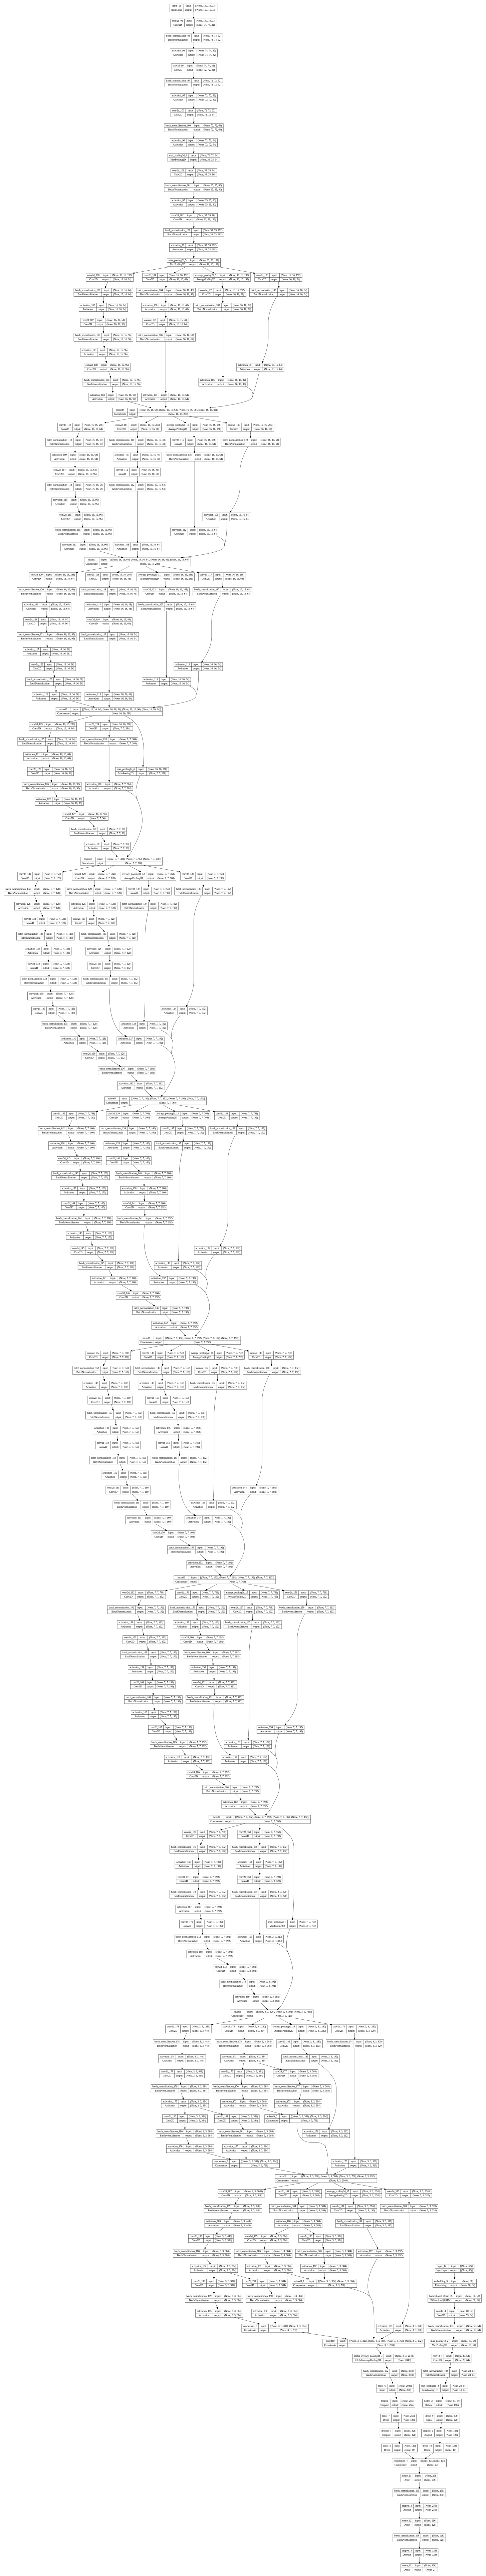

In [ ]:
for vm, visual_model in enumerate(visual_models_lsit):
    for tm, textual_model in enumerate(dl_textual_models_lsit):
        con_layer = concatenate([visual_model.output, textual_model.output])
        fusion_dense1 = Dense(256, activation='relu')(con_layer)
        fusion_bn1 = BatchNormalization()(fusion_dense1)
        fusion_dropout1 = Dropout(0.5)(fusion_bn1)
        fusion_dense2 = Dense(128, activation='relu')(fusion_dropout1)
        fusion_bn2 = BatchNormalization()(fusion_dense2)
        fusion_dropout2 = Dropout(0.5)(fusion_bn2)
        out = Dense(2, activation='softmax')(fusion_dropout2)
        com_model = Model(inputs=[visual_model.input, textual_model.input], outputs=out)

        com_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=["accuracy"])

        model_name = visual_model_name[vm] + '_proposed' + dl_textual_model_name[tm] + '_early'
        print("\nModel Name:=====>\n", model_name)

        # print("\nModel Name:=====>\n", visual_model_name[vm] + '_proposed' + dl_textual_model_name[tm] + '_early')

        visualize_model(com_model, model_name)

In [ ]:
com_model.fit([train_image, train_pad_sequences],
                      train_data['label'],
                      validation_split=0.1,
                      epochs=20,
                      batch_size=32,
                      callbacks=callbacks_check(visual_model_name[vm] + '_' + dl_textual_model_name[tm])
                      )

In [ ]:
for vm in visual_model_name:
  for tm in dl_textual_model_name:
    print('Model name ===> ',vm+'_proposed'+tm)
    model = load_model("/content/drive/MyDrive/CM_MEMES-master/model/InceptionV3_LSTM+CNN.h5")
    pred = model.predict([test_image,test_pad_sequences])
    y_pred = np.argmax(pred,axis=1)
    print_metrices(test_data['label'], y_pred)

**Proposed Model (Late fusion)**

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, GlobalAveragePooling2D, Dense, Flatten, Conv1D,
                                     MaxPooling1D, LSTM, Bidirectional, Embedding, BatchNormalization,
                                     Dropout, concatenate)
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
def visual_models():
    inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    inception_model = inception
    inception_model.trainable = False
    inception_y = inception_model.output
    inception_pool = GlobalAveragePooling2D()(inception_y)
    inception_bn = BatchNormalization()(inception_pool)
    inception_dense1 = Dense(256, activation='relu')(inception_bn)
    inception_dropout1 = Dropout(0.5)(inception_dense1)
    inception_dense2 = Dense(128, activation='relu')(inception_dropout1)
    inception_dropout2 = Dropout(0.5)(inception_dense2)
    inception_output = Dense(10, activation='relu')(inception_dropout2)
    inception_img_model = Model(inputs=inception_model.input, outputs=inception_output)
    image_models = [inception_img_model]
    return image_models


def textual_models():
    lc_text_inputs = Input(shape=(max_len,))
    lc_embedding_layer = Embedding(vocab_size, 64)(lc_text_inputs)
    LSTM_Layer = Bidirectional(LSTM(32, return_sequences=True))(lc_embedding_layer)
    lc_conv1 = Conv1D(64, 2, activation='relu')(LSTM_Layer)
    lc_bn1 = BatchNormalization()(lc_conv1)
    lc_pool1 = MaxPooling1D(2)(lc_bn1)
    lc_conv2 = Conv1D(64, 2, activation='relu')(lc_pool1)
    lc_bn2 = BatchNormalization()(lc_conv2)
    lc_pool2 = MaxPooling1D(2)(lc_bn2)
    lc_flat = Flatten()(lc_pool2)
    lc_dense_layer_1 = Dense(128, activation='relu')(lc_flat)
    lc_dropout1 = Dropout(0.5)(lc_dense_layer_1)
    lc_dense_layer_2 = Dense(10, activation='relu')(lc_dropout1)
    cnn_lstm_model = Model(inputs=lc_text_inputs, outputs=lc_dense_layer_2)
    dl_textual_models = [cnn_lstm_model]
    return dl_textual_models

In [ ]:
visual_model_name = ['InceptionV3']
visual_models_lsit = visual_models()

dl_textual_model_name = ['LSTM+CNN']
dl_textual_models_lsit = textual_models()

In [ ]:
for tm,textual_model in enumerate(dl_textual_models_lsit):
  # Concatenating the output of 2 classifiers
  # Reshape or flatten the output of one or both models to make them compatible for concatenation
  visual_output = keras.layers.Flatten()(visual_models_lsit[0].output) # Flatten the visual model output
  con_layer = keras.layers.concatenate([visual_output, textual_model.output])
  # Provide a unique name for this Dense layer using tm in the name
  final_dense = Dense(4, activation="relu", name=f"final_dense_{tm}")(con_layer)
  #dropout = Dropout(0.1)(final_dense)
  # Provide a unique name for the output layer using tm in the name
  out = Dense(2,activation='softmax', name=f"output_layer_{tm}")(final_dense)
  com_model = Model(inputs = [visual_models_lsit[0].input, textual_model.input], outputs=out)

  com_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics = ["accuracy"])


  print("\nModel Name:=====>\n",visual_model_name[0]+'_'+dl_textual_model_name[tm]+'proposed_late')

  com_model.fit([train_image,train_pad_sequences],
                      train_data['label'],
                      validation_split = 0.1,
                      epochs=20,
                      batch_size=32,
                      callbacks = callbacks_check(visual_model_name[0]+'_'+dl_textual_model_name[tm]+'proposed_late')
            )

In [ ]:
for vm in visual_model_name:
  for tm in dl_textual_model_name:
    print('Model name ===> ',vm+'proposed_late'+tm)
    model = load_model(models_path+ vm+'_'+tm+'proposed_late'+".h5")
    pred = model.predict([test_image,test_pad_sequences])
    y_pred = np.argmax(pred,axis=1)
    print_metrices(test_data['label'], y_pred)